# Conway's Game of Life 

Conway's Game of Life is an example of cellular automata. The rules of the game are straightforward and a good discussion can be found on Wikipedia, https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life.

## Rules:

From Wikipedia,"The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, alive or dead, or "populated" or "unpopulated". Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

    Any live cell with fewer than two live neighbours dies, as if caused by underpopulation.
    Any live cell with two or three live neighbours lives on to the next generation.
    Any live cell with more than three live neighbours dies, as if by overpopulation.
    Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

The initial pattern constitutes the seed of the system. The first generation is created by applying the above rules simultaneously to every cell in the seed—births and deaths occur simultaneously, and the discrete moment at which this happens is sometimes called a tick (in other words, each generation is a pure function of the preceding one). The rules continue to be applied repeatedly to create further generations."

## Predictibility and Long-term Behavior
One of the interesting features of the Game of Life is that it is very difficult to predict which populations will survive many generations and which will go extinct quickly. 

## The Model
The model employed in this example uses a variable-sized 2-d grid initially populated by a binomial random number generator. A cell that holds the value 1 is said to be "alive" while a cell that holds the value 0 is said to be "dead". A probability value for initially being alive is specified as well as the number of columns and rows of the grid and lastly the number of generations to iterate through. If the population ever dies out the simulation is halted. 

Remarkably, some stable forms of life have been discovered, Still, Oscillators, and some that actually have the ability to move across the plane such as Spaceships and Gliders. 

A possible extension to the model could be to allow for random mutations to occur. 

First Generation


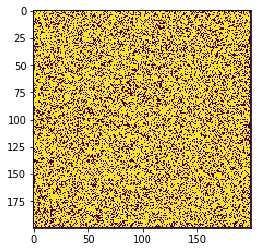

In [ ]:
import numpy
import sys
from matplotlib import pyplot as plt


#prob = float(sys.argv[1])
#COLS = int(sys.argv[2])
#ROWS = int(sys.argv[3])
#generations = int(sys.argv[4])
prob = 0.7
COLS = 200
ROWS = 198
generations = 100

N=numpy.random.binomial(1,prob,size=(ROWS+2)*COLS)
M=numpy.reshape(N,(ROWS+2,COLS))

M[0,:] = 0
M[ROWS+1,:] = 0
M[:,0] = 0
M[:,COLS-1] = 0

initM = numpy.copy(M)
#print initM
print("First Generation")

plt.imshow(initM, interpolation='nearest')
plt.show()

generation = 0
for i in xrange(generations):
        generation = generation + 1
 #       print ("Generation = ",generation)
        intermediateM = numpy.copy(M)
        for ROWelem in xrange(1,ROWS+1):
                for COLelem in xrange(1,COLS-1):
                        sum = ( M[ROWelem-1,COLelem-1]+M[ROWelem-1,COLelem]+M[ROWelem-1,COLelem+1]
                            +M[ROWelem,COLelem-1]+M[ROWelem,COLelem+1]
                            +M[ROWelem+1,COLelem-1]+M[ROWelem+1,COLelem]+M[ROWelem+1,COLelem+1] )
        #               print(ROWelem," ",COLelem," ",sum)
                        if M[ROWelem,COLelem] == 1:
                                if sum < 2:
                                        intermediateM[ROWelem,COLelem] = 0
                                elif sum > 3:
                                        intermediateM[ROWelem,COLelem] = 0
                                else:
                                        intermediateM[ROWelem,COLelem] = 1
                        if M[ROWelem,COLelem] == 0:
                                if sum == 3:
                                        intermediateM[ROWelem,COLelem] = 1
                                else:
                                        intermediateM[ROWelem,COLelem] = 0
        M = numpy.copy(intermediateM)
        if numpy.sum(M) == 0:
                print("Extinction Occurs at generation = ",generation)
                plt.imshow(M, interpolation='nearest')
                plt.show()
                break
      #  print(" ")
      #  print M

#print(" ")
#print(" ")
#print("First Generation")
#print initM

#print(" ")
print("Present Generation = %d" %(generation))
#print M
plt.imshow(M, interpolation='nearest')
plt.show()